In [1]:
!pip install kaggle
from google.colab import files 
files.upload() #download and upload json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samratalam","key":"04f3b6633583fdfd1704c7e3a2ac2ad5"}'}

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 95% 258M/271M [00:01<00:00, 167MB/s]
100% 271M/271M [00:01<00:00, 154MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 85.5MB/s]
 99% 540M/543M [00:03<00:00, 127MB/s]
100% 543M/543M [00:03<00:00, 150MB/s]


In [4]:
from zipfile import ZipFile
file_name= "test1.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
from zipfile import ZipFile
file_name= "train.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
print('done')

done


In [6]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import os

from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [7]:
#define
Image_Height = 128
Image_Width = 128
Image_Shape = (128,128)
Image_Channels = 3


In [8]:
#pre processing train data
filenames = os.listdir('/content/train') ##########
#make a list of categories
categories = []

for filename in os.listdir('/content/train'):
  category = filename.split('.')[0]
  if category == 'dog' :
    categories.append(1) #1 for dog and 0 for cat
  else :
    categories.append(0)

#make a dictonary
df = pd.DataFrame(         ################
    {
     'filename' : filenames,
     'category':categories
    }
)




In [9]:
df.tail()

,filename,category
24995,cat.779.jpg,0
24996,dog.12440.jpg,1
24997,dog.5002.jpg,1
24998,cat.9458.jpg,0
24999,cat.6221.jpg,0


In [10]:
df.head()

,filename,category
0,dog.4896.jpg,1
1,cat.5584.jpg,0
2,dog.8244.jpg,1
3,cat.10965.jpg,0
4,dog.5263.jpg,1


In [11]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

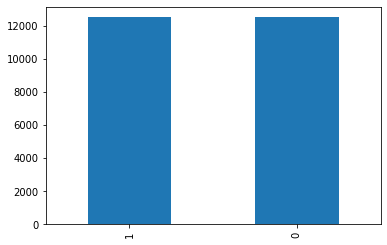

In [12]:
df['category'].value_counts().plot.bar()

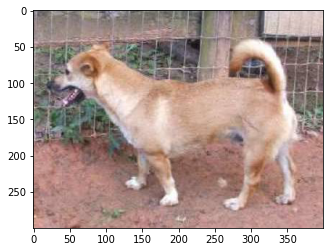

In [13]:
#see sample images
train_path = "/content/train"

#''/content/train'' add '/' in tha last of the path 

sample = random.choice(filenames)
image = load_img('/content/train/'+sample)

plt.imshow(image)

In [14]:
#Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
#Conv Layer: This layer will extract features from image.
#Pooling Layer: This layerreduce the spatial volume of input image after convolution.
#Fully Connected Layer: It connect the network from a layer to another layer
#Output Layer: It is the predicted values layer.

In [15]:
#import library for making models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Activation,BatchNormalization

In [16]:
#model 
#conv---max--drop--conv---max--drop---conv--max---drop--flatten--dense--batchnormalize--dropout--dense

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width, Image_Height, Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax')) #2 cat and dog

model.compile(loss='categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy']
              
              )

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [17]:
#callbacks
#Early Stop     #########
#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
from keras.callbacks import EarlyStopping , ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)

In [18]:
#Learning Rate Reduction
#We will reduce the learning rate when then accuracy not increase for 2 steps ###########

reduce_learnig_rate = ReduceLROnPlateau(monitor='val_accuracy' ,patience=2, factor=0.5,verbose=1,min_lr=0.00001)

In [19]:
#callbacks

callbacks = [earlystop , reduce_learnig_rate]

In [20]:
#prepare data
#Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.
#So we will convert 1 to dog and 0 to cat

df['category'] =df['category'].replace({0:'cat' ,1:'dog'})


In [21]:
train_df , validation_df =train_test_split(df , test_size =0.20 ,random_state=10)
train_df = train_df.reset_index(drop=True)         ########
validation_df = validation_df.reset_index(drop =True) #######

In [22]:
train_df['category'].value_counts()

cat    10023
dog     9977
Name: category, dtype: int64

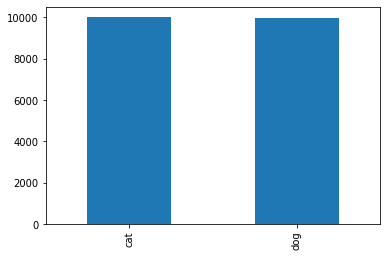

In [23]:
train_df['category'].value_counts().plot.bar()

In [24]:

validation_df['category'].value_counts()

dog    2523
cat    2477
Name: category, dtype: int64

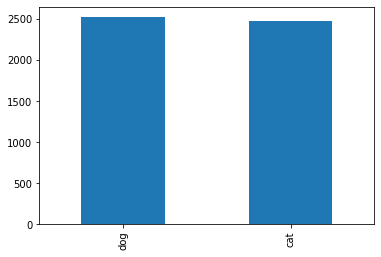

In [25]:
validation_df['category'].value_counts().plot.bar()

In [26]:
total_train = train_df.shape[0]
total_val = validation_df.shape[0]
batch_size = 15

print(total_train)
print(total_val)

20000
5000


In [27]:
print(train_df.shape)
print(validation_df.shape)

(20000, 2)
(5000, 2)


In [28]:
#training generator

train_datagen = ImageDataGenerator(
    rotation_range =15,
    rescale = 1./255, # multiply the data by the value provided
    shear_range =0.1, #shear means force image to change x or y axis 0.1
    zoom_range =0.2,
    horizontal_flip = True,
    width_shift_range =0.1,
    height_shift_range =0.1

)
########################################################
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    '/content/train/',
    x_col = 'filename' ,
    y_col = 'category' ,
    target_size = Image_Shape,
    class_mode = 'categorical' ,
    batch_size = batch_size


)

Found 20000 validated image filenames belonging to 2 classes.


In [29]:
val_datagen = ImageDataGenerator(
    rescale =1./255,
    rotation_range =15
)

val_generator = val_datagen.flow_from_dataframe(
    validation_df,
    '/content/train/',
    x_col= 'filename',
    y_col='category',
    target_size = Image_Shape,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [30]:
Fast_Run = False
epochs =3 if Fast_Run else 10

history= model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = val_generator,
    callbacks = callbacks,
    validation_steps = total_val / batch_size,
    steps_per_epoch = total_train/batch_size
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 937s 701ms/step - loss: 0.9266 - accuracy: 0.6096 - val_loss: 0.6545 - val_accuracy: 0.6216
Epoch 2/10
1333/1333 [==============================] - 930s 697ms/step - loss: 0.5547 - accuracy: 0.7275 - val_loss: 0.5055 - val_accuracy: 0.7564
Epoch 3/10
1333/1333 [==============================] - 928s 696ms/step - loss: 0.5060 - accuracy: 0.7615 - val_loss: 0.4194 - val_accuracy: 0.8186
Epoch 4/10
1333/1333 [==============================] - 929s 697ms/step - loss: 0.4686 - accuracy: 0.7810 - val_loss: 0.4454 - val_accuracy: 0.7966
Epoch 5/10
1333/1333 [==============================] - 947s 710ms/step - loss: 0.4361 - accuracy: 0.8064 - val_loss: 0.3900 - val_accuracy: 0.8322
Epoch 6/10
1333/1333 [==============================] - 930s 697ms/step - loss: 0.4198 - accuracy: 0.8163 - val_loss: 0.4016 - val_accuracy: 0.8216
Epoch 7/10
1333/1333 [==============================] - 928s 696ms/step - loss: 0.4030 - accuracy: 0.8208 - val_

In [31]:
#save model
model.save_weights('model.h5') 

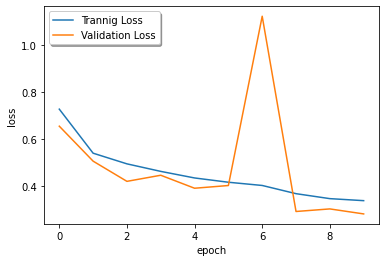

In [32]:
plt.plot(history.history['loss'],label='Trannig Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best' , shadow=True)
plt.show()

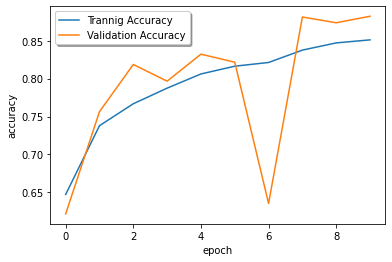

In [33]:
plt.plot(history.history['accuracy'] , label='Trannig Accuracy')
plt.plot(history.history['val_accuracy'] ,label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

In [35]:
# prepare test data
test_filenames = os.listdir('/content/test1')
test_path = '/content/test1'

test_df = pd.DataFrame(
    {
        'filenames' : test_filenames
    }
)

n_samples = test_df.shape[0]

In [36]:
#make test generator
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    '/content/test1/',
    x_col = 'filenames',
    y_col = None,        ###########
    class_mode = None,    #########
    target_size = Image_Shape,
    batch_size = batch_size,
    shuffle = False


)


Found 12500 validated image filenames.


In [37]:
#predict
predict = model.predict_generator(test_generator ,steps = np.ceil(n_samples/batch_size) )


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [38]:
#For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

test_df['category'] = np.argmax(predict , axis =-1)

In [46]:
#We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
#important value and key ----> (v,k) for mapping
print(label_map)
#print(train_generator.class_indices.items())

print(test_df['category'] )



{0: 'cat', 1: 'dog'}
0        dog
1        cat
2        cat
3        cat
4        dog
        ... 
12495    cat
12496    cat
12497    dog
12498    cat
12499    cat
Name: category, Length: 12500, dtype: object


In [47]:
#now replace 0 and 1 to cat and dog(label_map)

test_df['category'] = test_df['category'].replace(label_map)

print(test_df['category'])

0        dog
1        cat
2        cat
3        cat
4        dog
        ... 
12495    cat
12496    cat
12497    dog
12498    cat
12499    cat
Name: category, Length: 12500, dtype: object


In [59]:
test_df['filenames']

0         1516.jpg
1         3838.jpg
2        12317.jpg
3        12209.jpg
4         1938.jpg
           ...    
12495     9159.jpg
12496     3879.jpg
12497     1301.jpg
12498     6763.jpg
12499     1740.jpg
Name: filenames, Length: 12500, dtype: object

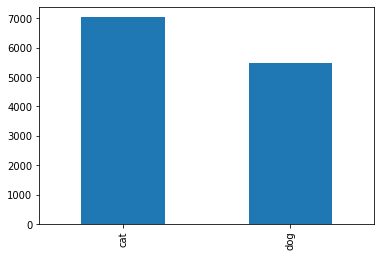

In [48]:
test_df['category'].value_counts().plot.bar()

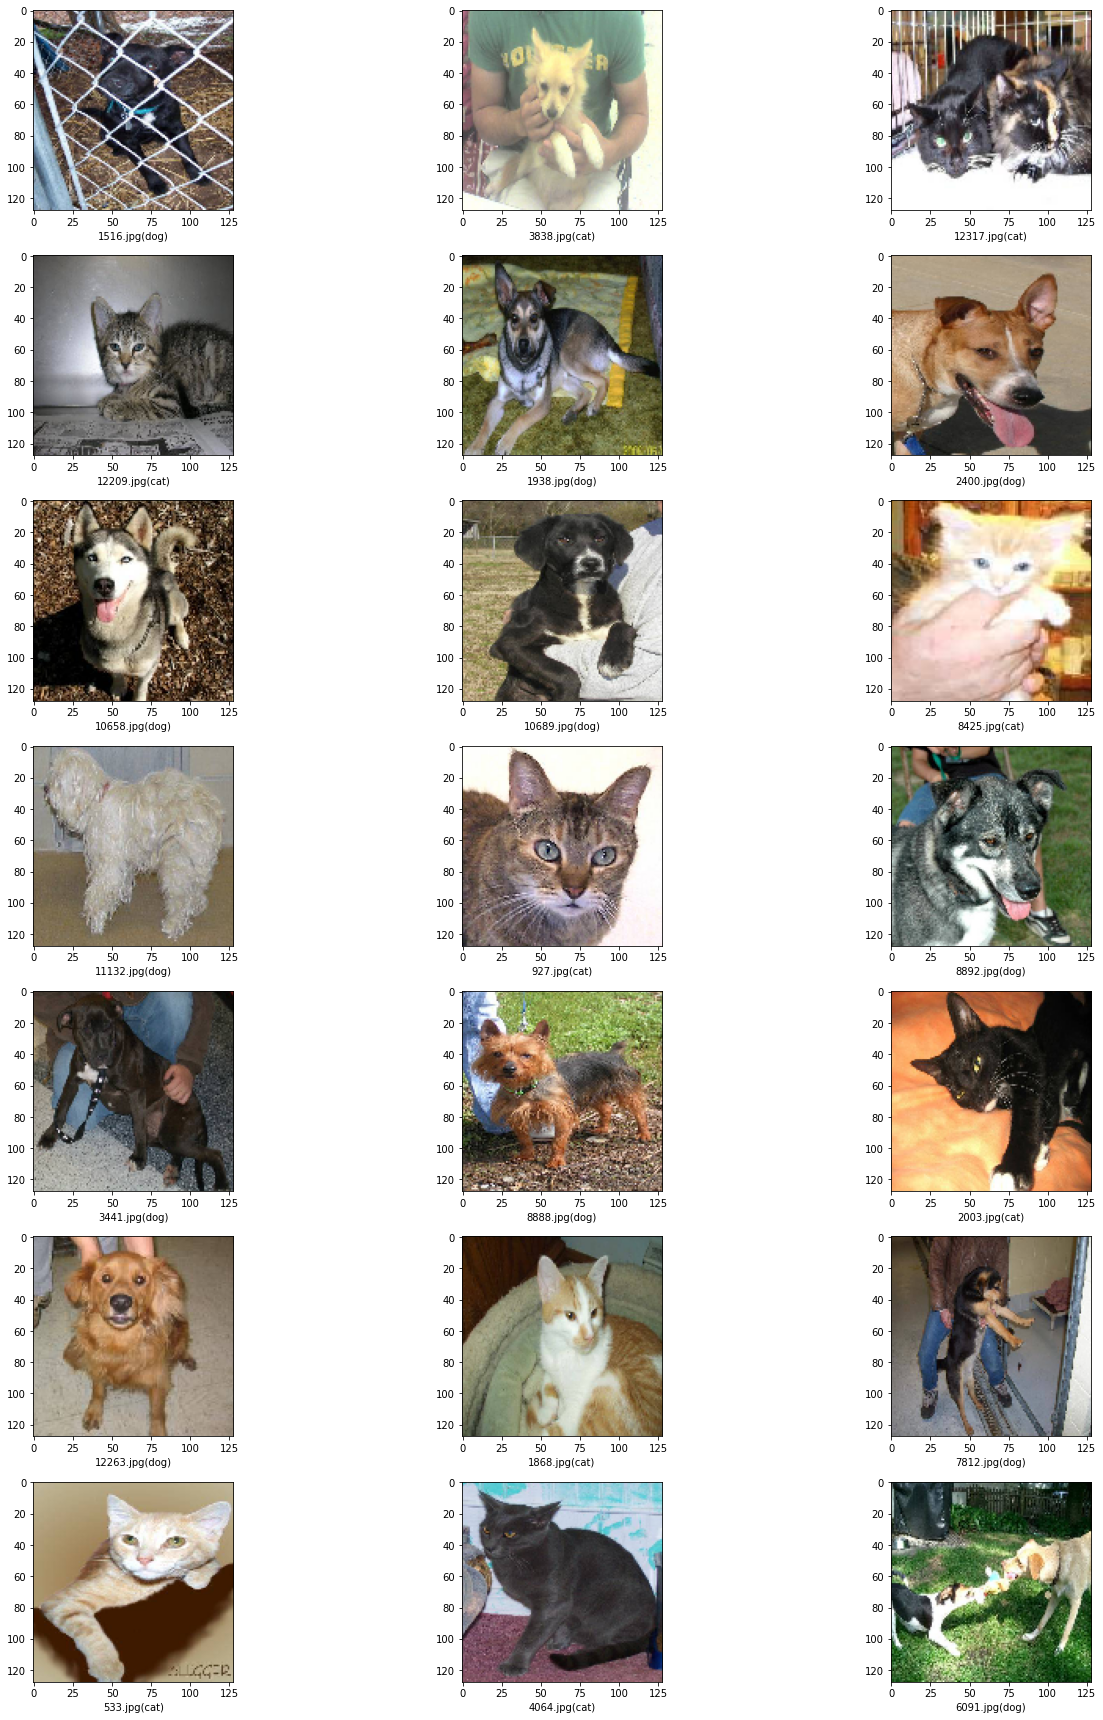

In [67]:
sample_test = test_df.head(21)
sample_test.head()
plt.figure(figsize=(20, 24))
for index, row in sample_test.iterrows():
    filename = row['filenames']
    category = row['category']
    img = load_img("/content/test1/"+filename, target_size=Image_Shape)
    plt.subplot(7, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()